In [22]:
from google.colab import drive
drive.mount('/content/drive')
%pip install pandas
from pandas import *
%pip install --upgrade pip
%pip install --upgrade nltk
%pip install PyPDF2
%pip install ntlk
import os
from PyPDF2 import PdfReader
import nltk 

nltk.download('wordnet')
nltk.download('punkt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:

# # importing required modules
# from PyPDF2 import PdfReader

from nltk.corpus import wordnet as wn
# import nltk 
# # nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

  
lemmatizer = WordNetLemmatizer()


part = wn.synsets('body_part')[0]

# https://stackoverflow.com/questions/73117109/how-to-identify-body-part-names-in-a-text-with-python
def is_body_part(candidate):
    for ss in wn.synsets(candidate):
        # only get those where the synset matches exactly
        name = ss.name().split(".", 1)[0]
        if name != candidate:
            continue
        hit = part.lowest_common_hypernyms(ss)
        if hit and hit[0] == part:
            return True
    return False

import os
 
# assign directory
directory = '/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/scripts/'
 
# iterate over files in
# that directory

files = []
for filename in os.scandir(directory):
    if filename.is_file():
        files.append(filename.path)
 



In [24]:
def get_title(file_name):
    title = file_name.split("/")[-1]
    # title = title.replace(" ","")
    # title = title.replace("-","")
    title = title.replace(".pdf","")
    title = title.replace(".php","")
    
    return title
# # getting a specific page from the pdf file
# page = reader.pages[0]
 
# # extracting text from page
# text = page.extract_text()

# creating a pdf reader object


 
# printing number of pages in pdf file
# print(len(reader.pages))


words_0= ['body', 'lips', 'beauty', 'age', 'smile', 'pants', 'skirt', 'dress', 'shirt', 'glow', 'shorts', 'hand','face','finger', 'throat','neck','hair','skin','arm','figure','shoulder'] 
adj_0=['beautiful', 'gorgeous', 'cute', 'pretty', 'devoted', 'lawful','housewife', 'dumb', 'ignorant', 'silly', 'fragile', 'frightening', 'enchanting', 'stunning','toned', 'breathtaking', 'breath-taking', 'sultry','divine', 'perfect']
words_1=['ass', 'buxom','boob', 'boobs', 'breast', 'breasts','thighs', 'bottom', 'curves', 'underwear', 'panty', 'stockings', 'panties', 'lingerie', 'bra', 'nipple','vagina','cunt','']
adj_1= ['seductive','sexy','trashy', 'nude', 'promiscuous', 'sexual', 'hot', 'hottie', 'erotic','fuck-me', 'fuck me','juicy']


keywords = ['body','boob','chest','bosom','thighs','thigh','waist','breast','ass','lips',
                                                                                'beautiful','attractive','hottie','hot','skirt','beauty','sexy','age',
                                                                                'blond','smile','dumb','cute','perfect','buxom','dress','fit','tight',
                                                                                'blonde','natural','bra','underwear','panty','panties','divine',
                                                                                'curve','curves','trashy','nude','toned','fragile','pretty','womanhood',
                                                                                'breathtaking','fuck me eyes','erotic','lingerie','erotic','glow','gorgeous',
                                                                                'banging','seductive','promiscuous','enchanting',
                                                                                'figure','fuck-me','fuck me','sexual','pants','shirt','dress','shorts']


movies_dict={}
movies_dict_1={}


for f in files:
    movie_title = get_title(f)
    print("--------------------------------------------", movie_title, "-----------------------------------------")

    reader = PdfReader(f)
    lst=[]
    # len(reader.pages)
    for i in range(0,len(reader.pages)):
        page = reader.pages[i]
        text = page.extract_text()
        lst.append(text)
    #     print(text)
    #     print("-----------------")
    # len(lst[0])

    
    word_counts={}
    word_counts_1={}
    
    check = ["she", "her", "woman", "woman's", "women", "women's", "she's"]

    for i in lst:
        tokens = word_tokenize(i)
    #     for j in i:
    #         tokens = word_tokenize(j) 
    #         print(tokens)
        for k in range(0,len(tokens)):
            #lemmatize
            tokens[k] = lemmatizer.lemmatize(tokens[k])
    #         print(tokens[k].lower())
    
            if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:
                
                gram2 = tokens[k-2].lower()
                gram1 = tokens[k-1].lower()
                gram = tokens[k].lower()
                if k+1 in range(-len(tokens), len(tokens)):
                  gram0 = tokens[k+1].lower()

                # if k-3 in range(-len(tokens), len(tokens)):
                #   gram3 = tokens[k-3].lower()

                if  gram2 in check or gram1 in check or gram0 in check:
                  print(gram2,gram1,gram,gram0)

              
              
                  if tokens[k].lower() in word_counts:
                      # print(tokens[k], gram0)
                      word_counts[tokens[k].lower()] += 1
                  else:
                      word_counts[tokens[k].lower()] = 1

            if tokens[k].lower() in words_1+adj_1:
                if k+1 in range(-len(tokens), len(tokens)):
                  gram0 = tokens[k+1].lower()

                # if k-3 in range(-len(tokens), len(tokens)):
                #   gram3 = tokens[k-3].lower()
                
                gram2 = tokens[k-2].lower()
                gram1 = tokens[k-1].lower()
                gram0 = tokens[k].lower()
#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")

                if gram2 in check or gram1 in check or gram0 in check:
            
                    if tokens[k].lower() in word_counts_1:
                        # print(tokens[k], gram0)
                        word_counts_1[tokens[k].lower()] += 1
                    else:
                        word_counts_1[tokens[k].lower()] = 1
                    print('dubious',gram2,gram1,gram0)
                    
    movies_dict[movie_title] = word_counts
    movies_dict_1[movie_title] = word_counts_1
    
    #make sure movie names are the primary keys     
print(movies_dict,"------------------------------------------------------------------------------------", movies_dict_1)

-------------------------------------------- Star Wars_ episode IV -----------------------------------------
woman 's hand puts
in her eye slowly
her inert body .
shaking her fist at
. her hand are
she 's beautiful .
bring her back !
. her hand are
lower her head .
on her face .
her incredible beauty and
on her face .
against her body .
over her shoulder out
shake her head .
at her side .
throw her arm around
-------------------------------------------- The-Exorcist -----------------------------------------
over her shoulder to
stroke her face .
in her mouth and
in her hand .
. she hand her
close her eye .
shake her head .
should have left her
club her hand on
to her head .
affected her brain ,
up her leg ,
turn her eye to
with her back against
her goddam cunt .
dubious her goddam cunt
with her eye closed
to her shoulder .
's her brain .
she lay back onto
on her arm .
onto her neck making
thrashing her torso against
, her eye roll
and her throat swells
up her dress and
she fall back an

In [25]:

body_descriptions = DataFrame.from_dict(movies_dict, orient="index")
print(body_descriptions)

                                               hand   eye  body  fist  \
Star Wars_ episode IV                           3.0   1.0   2.0   1.0   
The-Exorcist                                   14.0   6.0   NaN   NaN   
fiddler on the roof                             1.0   NaN   NaN   NaN   
ManofSteelnSecondDraftn                         8.0  17.0   NaN   NaN   
pirates-of-the-caribbean-dead-mans-chest-2006   2.0   3.0   NaN   NaN   
...                                             ...   ...   ...   ...   
Going My Way                                    NaN   NaN   NaN   NaN   
the bells of st.mary                            NaN   NaN   NaN   NaN   
song-of-the-south                               NaN   NaN   NaN   NaN   
batmanforever                                   NaN   NaN   NaN   NaN   
Sergeant York                                   NaN   NaN   NaN   NaN   

                                               beautiful  back  head  face  \
Star Wars_ episode IV                        

In [26]:
naughty_descriptions = DataFrame.from_dict(movies_dict_1, orient="index")
naughty_descriptions


,cunt,vagina,bra,underwear,breast,hot,sexual,nude
The-Exorcist,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
superman,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
beverly-hills-copII,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
forrestgump,NaN,NaN,3.0,1.0,1.0,NaN,NaN,NaN
ghost,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
psycho,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Blazing-Saddles (1),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
titanic-numbered,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
supermanII,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
spiderman,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [27]:
#get general descriptions - n-grams


words_0= ['body', 'lips', 'beauty', 'attractive', 'age', 'smile', 'pants', 'skirt', 'dress', 'shirt', 'glow', 'shorts','clothes', 'jacket'] 
adj_0=['beautiful', 'handsome', 'muscular', 'gorgeous', 'cute', 'confused', 'sad','pretty', 'devoted', 'lawful','housewife', 'dumb', 'ignorant', 'silly', 'smart','thinking','stunned','mysterious', 'enchanting', 'stunning','toned', 'breathtaking', 'breath-taking', 'divine', 'perfect']


words_prob=['ass', 'buxom','boob', 'boobs', 'butt', 'buttock', 'breast', 'breasts','thighs', 'bottom', 'curves', 'underwear', 'panty', 'stockings', 'panties', 'lingerie', 'bra', 'nipple']
adj_prob= ['seductive','sexy','trashy', 'nude', 'promiscuous', 'sexual', 'hot', 'hottie', 'erotic','fuck-me', 'fuck me','juicy']


movies_dict_men={}
movies_dict_women={}


movies_dict_men_1={}
movies_dict_women_1={}


#all data summed up

movies_tot={}
movies_total_f={}
movies_total_m={}
movies_total_f_1={}
movies_total_m_1={}

for f in files:
    movie_title = get_title(f)
    print("--------------------------------------------", movie_title, "-----------------------------------------")


    reader = PdfReader(f)
    lst=[]
    # len(reader.pages)
    for i in range(0,len(reader.pages)):
        page = reader.pages[i]
        text = page.extract_text()
        lst.append(text)
    #     print(text)
    #     print("-----------------")
    # len(lst[0])

    
    word_counts_men={}
    word_counts_women={}
    word_counts_men_1 = {}
    word_counts_women_1 = {}

    
    
    from nltk.tokenize import word_tokenize

    for i in lst:
        tokens = word_tokenize(i)
    #     for j in i:
    #         tokens = word_tokenize(j) 
    #         print(tokens)
        for k in range(0,len(tokens)):
            #lemmatize
            tokens[k] = lemmatizer.lemmatize(tokens[k])
    #         print(tokens[k].lower())


#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")

            check_women = ['her','she','woman','women', "woman's","women's"]
            check_men = ['his','he','man','men',"man's","men's"]

            if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:
              if k+1 in range(-len(tokens), len(tokens)):
                gram0 = tokens[k+1].lower()

              # if k-3 in range(-len(tokens), len(tokens)):
              #   gram3 = tokens[k-3].lower()

      
              if k-2 in range(-len(tokens), len(tokens)):
                  
                  gram2 = tokens[k-2].lower()
              
              if k-1 in range(-len(tokens), len(tokens)):
                  gram1 = tokens[k-1].lower()
                  gram = tokens[k].lower()

    #CHECK WOMEN

              if gram2 in check_women or gram1 in check_women or gram0 in check_women:
                  print(gram2,gram1,gram,gram0)


              
                  if tokens[k].lower() in word_counts_women:
                      # print(tokens[k], gram0)
                      word_counts_women[tokens[k].lower()] += 1
                      movies_total_f[tokens[k].lower()] += 1

                  else:
                      word_counts_women[tokens[k].lower()] = 1
                      movies_total_f[tokens[k].lower()] = 1


        
                
#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")
#CHECK MEN
            
            # if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:

              if gram2 in check_men or gram1 in check_men or gram0 in check_men:
              
                  if tokens[k].lower() in word_counts_men:
                      # print(tokens[k], gram0)
                      word_counts_men[tokens[k].lower()] += 1
                      movies_total_m[tokens[k].lower()] += 1

                  else:
                      word_counts_men[tokens[k].lower()] = 1
                      movies_total_m[tokens[k].lower()] = 1

                  print("men",gram2,gram1,gram,gram0)

            
   #========================================!!!!!!!!!!! FIND INAPPROPRIATE SPEECH !!!!!!!!!!!!!!!!!!!!!!!!!!==============================     


            if tokens[k].lower() in words_1+adj_1:
              if k+1 in range(-len(tokens), len(tokens)):
                gram0 = tokens[k+1].lower()

              # if k-3 in range(-len(tokens), len(tokens)):
              #   gram3 = tokens[k-3].lower()

      
              if k-2 in range(-len(tokens), len(tokens)):
                  
                  gram2 = tokens[k-2].lower()
              
              if k-1 in range(-len(tokens), len(tokens)):
                  gram1 = tokens[k-1].lower()
                  gram = tokens[k].lower()

    #CHECK WOMEN

              if gram2 in check_women or gram1 in check_women or gram0 in check_women:
                  print(gram2,gram1,gram,gram0)


              
                  if tokens[k].lower() in word_counts_women_1:
                      # print(tokens[k], gram0)
                      word_counts_women_1[tokens[k].lower()] += 1
                      movies_total_f_1[tokens[k].lower()] += 1

                  else:
                      word_counts_women_1[tokens[k].lower()] = 1
                      movies_total_f_1[tokens[k].lower()] = 1


                  
  #                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")
  #CHECK MEN
              
              # if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:

              if gram2 in check_men or gram1 in check_men or gram0 in check_men:
              
                  if tokens[k].lower() in word_counts_men_1:
                      # print(tokens[k], gram0)
                      word_counts_men_1[tokens[k].lower()] += 1
                      movies_total_m_1[tokens[k].lower()] += 1

                  else:
                      word_counts_men_1[tokens[k].lower()] = 1
                      movies_total_m_1[tokens[k].lower()] = 1

                  print("men_1",gram2,gram1,gram,gram0)
      
          
  # print(movies_dict_women,"------------------------------------------------------------------------------------", movies_dict_men)
        
    movies_dict_women[movie_title] = word_counts_women
    movies_dict_men[movie_title] = word_counts_men
    movies_tot["males"]=movies_total_m
    movies_tot["females"]=movies_total_f

    #fill inappropriate

    movies_dict_women_1[movie_title] = word_counts_women_1
    movies_dict_men_1[movie_title] = word_counts_men_1







Streaming output truncated to the last 5000 lines.
men out his tongue ,
men into his mouth .
men open his mouth in
men ; he smile back
men he smile back .
her work area and
shake her head no
men with his tongue .
men with his tongue ,
men between his thumb and
shake her head no
men with his vent ports
men but his mouth is
men get his hand caught
men roll his eye and
she go back into
men having his shoulder and
men shake his head .
men shake his head again
men lift his hand slightly
men ( he smile )
men cover his eye .
men put his arm around
men he sail right over
men with his side exhaust
men us his side exhaust
men put his face right
men his face right up
men of his hand page
men drop his head .
men in his eye .
men he turn back to
men shake his head .
men he march right past
men in his eye ,
men of his eye .
men . his heel hang
men in his eye .
men holding his arm to
around her neck .
men in his eye .
men to his left is
men to his right ,
men on his face .
men in his eye .
men roll h

In [28]:
print(movies_dict_women_1)
print(movies_dict_men_1)

{'Star Wars_ episode IV': {}, 'The-Exorcist': {'cunt': 1, 'vagina': 1}, 'fiddler on the roof': {}, 'song-of-the-south': {}, 'ManofSteelnSecondDraftn': {}, 'pirates-of-the-caribbean-dead-mans-chest-2006': {}, 'star-wars-lastjedi': {}, 'meninblack': {}, 'superman': {'bra': 1}, 'lawrence-of-arabia-1962': {}, 'independenceday': {}, 'the-godfather': {}, 'spider-man-2-2004': {}, 'harry-potter-and-the-deathly-hollows-part-2-2011': {}, 'the-avengers-2012': {}, 'top-gun-1986': {'hot': 1}, 'SomeLikeItHot': {}, 'jurassicpark': {}, 'starwars_revenge-of-sith': {}, 'star wars_the-empire-strikes-back': {}, 'terminator-2-judgement-day-1991': {}, 'the-graduate': {}, 'samson-and-delilah': {}, 'avatar': {}, 'casablanca': {}, 'ghostbuster': {}, 'beverly-hills-copII': {'bra': 1, 'nude': 1}, 'jaws-1975': {}, 'from_here_to_eternity_(1953)': {}, 'rogue-one': {}, 'batmanforever': {}, 'rocky': {}, 'BlackPanther': {}, 'gone with the wind': {}, 'forrestgump': {'bra': 3, 'underwear': 1, 'breast': 1}, 'starwars_the

In [29]:

movies_women = DataFrame.from_dict(movies_dict_women,orient="index")

movies_men = DataFrame.from_dict(movies_dict_men,orient="index")

print(movies_women.info())
print('---------------------------------------------------------------------------')
print(movies_men.info())


total_desc_men = DataFrame.from_dict(movies_total_m, orient="index")
total_desc_women = DataFrame.from_dict(movies_total_f, orient="index")

total_desc_men
# total_desc_women

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, Star Wars_ episode IV to Sergeant York
Columns: 123 entries, hand to muscle
dtypes: float64(123)
memory usage: 75.6+ KB
None
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, Star Wars_ episode IV to The Sea Chase
Columns: 185 entries, face to scalp
dtypes: float64(185)
memory usage: 114.8+ KB
None


,0
face,1
hair,3
arm,1
foot,1
throat,1
...,...
antenna,1
cranium,1
socket,1
beauty,1


In [30]:
# movies_women.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/movies_desc_women.csv")
# movies_men.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/movies_desc_men.csv")

total_desc_men.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/total_desc_men.csv")
total_desc_women.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/total_desc_women.csv")

print(movies_total_f)

{'hand': 2, 'eye': 28, 'body': 4, 'fist': 1, 'beautiful': 3, 'back': 1, 'head': 2, 'face': 2, 'beauty': 1, 'shoulder': 6, 'side': 1, 'arm': 1, 'clothes': 1, 'mouth': 3, 'left': 1, 'brain': 1, 'leg': 3, 'cunt': 1, 'neck': 2, 'torso': 1, 'throat': 4, 'dress': 7, 'jacket': 1, 'brow': 1, 'tongue': 2, 'vagina': 1, 'nostril': 1, 'finger': 3, 'lip': 1, 'stomach': 1, 'skin': 1, 'hair': 1, 'heart': 3, 'pretty': 1, 'saddle': 1, 'smile': 5, 'structure': 1, 'ball': 1, 'cheek': 3, 'feature': 1, 'right': 1, 'belly': 1, 'elbow': 1, 'waist': 4, 'nose': 1, 'chin': 2, 'heel': 1, 'foot': 7, 'pad': 1, 'knee': 2, 'forefoot': 1, 'nerve': 1, 'jaw': 1, 'hip': 1, 'thigh': 1, 'toe': 1, 'cock': 1, 'fin': 1, 'ear': 4, 'palm': 1, 'quick': 1, 'tail': 1, 'area': 1, 'center': 1, 'skirt': 2, 'bosom': 1, 'trap': 1, 'wrist': 1, 'ankle': 1, 'horn': 1, 'thinking': 1, 'fingernail': 1, 'shirt': 2, 'brush': 1, 'valve': 1, 'bone': 1, 'pin': 1, 'nail': 1, 'thumb': 1, 'lap': 2, 'stunned': 1, 'chamber': 1, 'fold': 1, 'age': 1, '

In [31]:
# Count total keywords across all movies
for movie_title in movies_dict_women:
    word_counts_women = movies_dict_women[movie_title]
    for keyword in word_counts_women:
        if keyword in movies_total_f:
            movies_total_f[keyword] += word_counts_women[keyword]
        else:
            movies_total_f[keyword] = word_counts_women[keyword]

for movie_title in movies_dict_men:
    word_counts_men = movies_dict_men[movie_title]
    for keyword in word_counts_men:
        if keyword in movies_total_m:
            movies_total_m[keyword] += word_counts_men[keyword]
        else:
            movies_total_m[keyword] = word_counts_men[keyword]

print(movies_total_m)
print(movies_total_f)



    # Count total keywords across all movies INAPPROPRIATE SPEECH
for movie_title in movies_dict_women_1:
    word_counts_women_1 = movies_dict_women_1[movie_title]
    for keyword in word_counts_women_1:
        if keyword in movies_total_f_1:
            movies_total_f_1[keyword] += word_counts_women_1[keyword]
        else:
            movies_total_f_1[keyword] = word_counts_women_1[keyword]


for movie_title in movies_dict_men_1:
    word_counts_men_1 = movies_dict_men_1[movie_title]
    for keyword in word_counts_men_1:
        if keyword in movies_total_m_1:
            movies_total_m_1[keyword] += word_counts_men_1[keyword]
        else:
            movies_total_m_1[keyword] = word_counts_men_1[keyword]





{'face': 652, 'hair': 65, 'arm': 388, 'foot': 316, 'throat': 52, 'lap': 17, 'shoulder': 208, 'back': 487, 'joint': 3, 'head': 812, 'eye': 752, 'hand': 1089, 'body': 140, 'system': 10, 'plate': 18, 'left': 112, 'beard': 8, 'stunned': 4, 'side': 79, 'claw': 24, 'small': 10, 'ear': 78, 'mouth': 129, 'paw': 7, 'cannon': 10, 'handsome': 7, 'lip': 82, 'wing': 13, 'nose': 53, 'tail': 25, 'brow': 35, 'jacket': 71, 'leg': 100, 'finger': 166, 'neck': 95, 'cheek': 30, 'tongue': 28, 'right': 117, 'thinking': 14, 'brain': 11, 'horn': 7, 'stomach': 14, 'smart': 11, 'age': 11, 'shirt': 78, 'smile': 115, 'wrist': 61, 'dress': 18, 'clothes': 30, 'heart': 50, 'knee': 111, 'glow': 5, 'brush': 18, 'palm': 38, 'toe': 6, 'fist': 97, 'skin': 30, 'blade': 14, 'temple': 15, 'jaw': 28, 'eyelid': 6, 'waist': 18, 'cock': 25, 'area': 2, 'ball': 7, 'thumb': 28, 'feature': 15, 'haunch': 7, 'heel': 19, 'saddle': 9, 'vessel': 2, 'ignorant': 2, 'thigh': 9, 'belly': 9, 'chin': 22, 'nerve': 8, 'pad': 5, 'breast': 9, 'elb

In [32]:
df_men = DataFrame.from_dict(movies_total_m, orient="index")


df_men = df_men.rename(columns={0:"men_count"})
df_men

df_women = DataFrame.from_dict(movies_total_f, orient="index")


df_women = df_women.rename(columns={0:"women_count"})
df_women

total_movie_counts = df_women.merge(df_men,left_index=True, right_index=True)
total_movie_counts

,women_count,men_count
hand,352,1089
eye,320,752
body,46,140
fist,4,97
beautiful,22,2
...,...,...
arch,2,2
perfect,2,2
flesh,2,12
plate,3,18


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


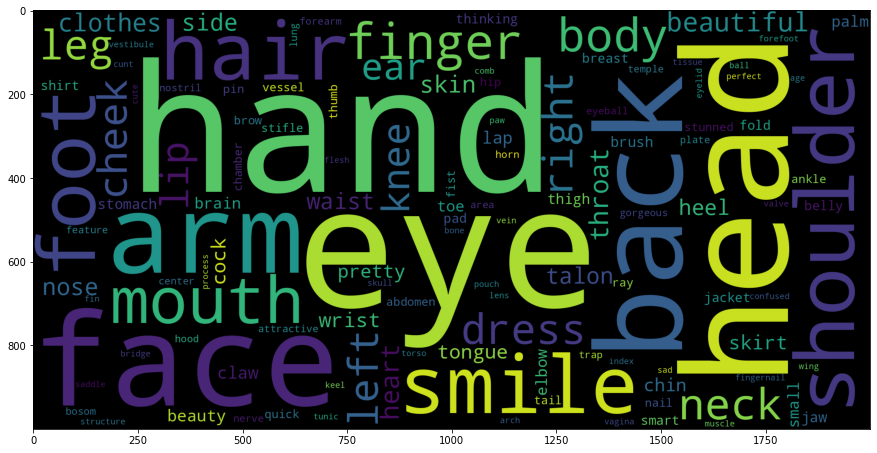

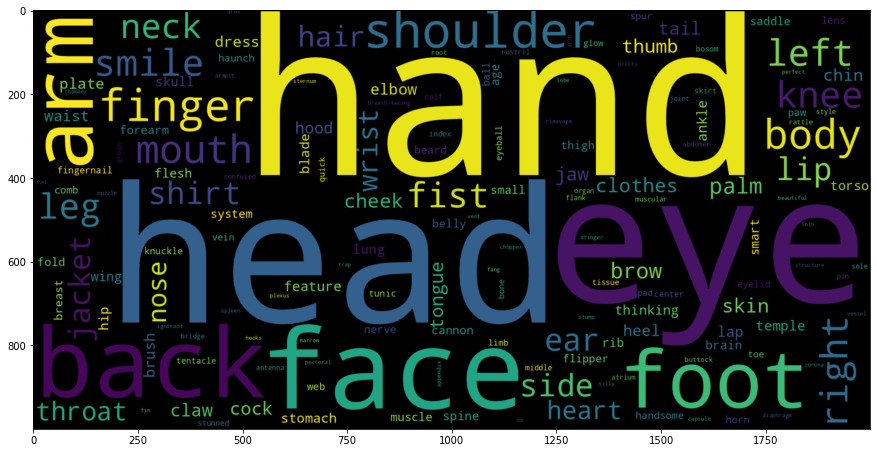

In [33]:
#word clouds

%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
overall_count_women = movies_total_f
overall_count_men = movies_total_m

wordcloud = WordCloud(width = 2000, height = 1000, max_words=160).fit_words(movies_total_f)
wordcloud1 = WordCloud(width = 2000, height = 1000, max_words=160).fit_words(movies_total_m)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud1, interpolation="bilinear")

# wordcloud_1_f= WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_f_1)
# wordcloud_1_m = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_m_1)


# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud_1_f)

# plt.figure(figsize=(15,8))
# plt.imshow(wordcloud_1_m)
# def gen_wc(dictionary):
#   for key in dictionary.keys():
#     wordcloud = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(key)
#     plt.savefig

In [14]:
def is_adj(token):

    synsets = wn.synsets(token)
    for synset in synsets:
        if synset.pos() == 'a':
          return True
        
        else:
          return False


adj_dic_m={}
adj_dic_f={}

for f in files:
    movie_title = get_title(f)
    print("--------------------------------------------", movie_title, "-----------------------------------------")

    reader = PdfReader(f)
    lst=[]

    for i in range(0,len(reader.pages)):
        page = reader.pages[i]
        text = page.extract_text()
        lst.append(text)

    adj_mov_f={}
    adj_mov_m={}

    
    check_women = ["she", "her", "woman", "women"]
    check_men = ["he", "his", "man", "men"]

    for i in lst:
        tokens = word_tokenize(i)
    #     for j in i:
    #         tokens = word_tokenize(j) 
    #         print(tokens)
        for k in range(0,len(tokens)):
            #lemmatize
            tokens[k] = lemmatizer.lemmatize(tokens[k])
    #         print(tokens[k].lower())
    
            if is_adj(tokens[k].lower()) == True :


              gram2 = tokens[k-2].lower()
              gram1 = tokens[k-1].lower()
              gram = tokens[k].lower()
              if k+1 in range(-len(tokens), len(tokens)):
                gram0 = tokens[k+1].lower()
              
              if k+2 in range(-len(tokens),len(tokens)):
                gram02 = tokens[k+2].lower()


              if  gram2 =="she" or gram1 =="her" or gram0 in ["woman","women","girl"]:
                print(gram2, gram1, tokens[k].lower(),gram0)

                if tokens[k].lower() in adj_mov_f:
                  adj_mov_f[tokens[k].lower()]+=1
                
                else:
                  adj_mov_f[tokens[k].lower()]=1


              
              # if  gram2 in check_men or gram1 in check_men or gram0 in check_men:
              if  gram2 =="he" or gram1 =="his" or gram0 in ["man","men","guy"]:
                print(gram2, gram1, tokens[k].lower(),gram0)

                if tokens[k].lower() in adj_mov_m:
                  adj_mov_m[tokens[k].lower()]+=1
                
                else:
                  adj_mov_m[tokens[k].lower()]=1



                  # print("-------------------------------------",movie_title,"-----------------------------",gram2,gram1,gram,gram0,gram02)

    adj_dic_f[movie_title]=adj_mov_f
  
    adj_dic_m[movie_title]=adj_mov_m


              # if tokens[k].lower() in word_counts:
              #     # print(tokens[k], gram0)
              #     word_counts[tokens[k].lower()] += 1
              # else:
              #     word_counts[tokens[k].lower()] = 1


-------------------------------------------- Star Wars_ episode IV -----------------------------------------
want her alive !
she is unable to
he continues on his
. his bright computer
among the mechanical men
by the beautiful girl
she 's beautiful .
he had some things
he left early .
finally the mechanical man
by his powerful ally
by her incredible beauty
he tug on the
he pull on artoo
in his early thirties
he concentrate on the
he 's on me
he is unable to
in his early fifties
making his delicate task
he concentrate on the
-------------------------------------------- The-Exorcist -----------------------------------------
she is on top
she carry on walking
she wa all the
put her some place
she show all the
he 's asleep .
she 's fortunate .
he fly backward .
she 's just seen
hold her tight !
a very powerful man
he notice some of
she ha just said
cause , proud men
he sprinkle some holy
-------------------------------------------- fiddler on the roof --------------------------------------

In [15]:
print(adj_dic_f)
print(adj_dic_m)


{'Star Wars_ episode IV': {'alive': 1, 'unable': 1, 'beautiful': 2, 'incredible': 1}, 'The-Exorcist': {'on': 2, 'all': 2, 'some': 1, 'fortunate': 1, 'just': 2, 'tight': 1}, 'fiddler on the roof': {'foolish': 1, 'other': 1, 'happy': 2, 'new': 1}, 'song-of-the-south': {}, 'ManofSteelnSecondDraftn': {'hard': 1, 'just': 1}, 'pirates-of-the-caribbean-dead-mans-chest-2006': {'on': 1, 'aware': 1, 'most': 1, 'all': 1}, 'star-wars-lastjedi': {}, 'meninblack': {'just': 2, 'some': 1, 'deeper': 1, 'hard': 1}, 'superman': {'just': 1, 'on': 2}, 'lawrence-of-arabia-1962': {}, 'independenceday': {'beautiful': 1, 'cellular': 1, 'stubborn': 1, 'on': 1, 'all': 1}, 'the-godfather': {'some': 2, 'wifely': 1, 'on': 2, 'asleep': 1, 'incredible': 1, 'afraid': 1, 'many': 1}, 'spider-man-2-2004': {'big': 2, 'angry': 1, 'just': 1, 'strong': 1, 'all': 1, 'some': 1}, 'harry-potter-and-the-deathly-hollows-part-2-2011': {'unsure': 1, 'tighter': 1}, 'the-avengers-2012': {'on': 5}, 'top-gun-1986': {'hard': 1, 'some': 1

In [16]:
# for movie in adj_dic_f:
#     counts_f = adj_dic_f[movie_title]
#     for keyword in counts_f:
#         if keyword in adj_dic_f:
#             adj_dic_f[keyword] += counts_f[keyword]
#         else:
#             adj_dic_f[keyword] = counts_f[keyword]


# for movie in adj_dic_m:
#     counts_m = adj_dic_m[movie_title]
#     for keyword in counts_m:
#         if keyword in adj_dic_m:
#             adj_dic_m[keyword] += counts_m[keyword]
#         else:
#             adj_dic_m[keyword] = counts_m[keyword]


def get_total_values(movies_dict):
  total_dict={}
  for movie in movies_dict:
    movie_count = movies_dict[movie]
    for keyword in movie_count.keys():
      if type(keyword) == str and keyword not in ["on","all","other","many","some","just","new","most","caroline"]:
        if keyword in total_dict:
          total_dict[keyword]+=movie_count[keyword]
        
        else:
          total_dict[keyword]=movie_count[keyword]
  
  return total_dict

      
# print(get_total_values(adj_dic_m))

print(get_total_values(adj_dic_m))
print(get_total_values(adj_dic_f))


{'bright': 2, 'mechanical': 4, 'early': 8, 'powerful': 7, 'unable': 5, 'delicate': 1, 'asleep': 7, 'backward': 6, 'proud': 2, 'important': 2, 'oldest': 3, 'ugly': 2, 'strange': 10, 'big': 35, 'postal': 1, 'weak': 3, 'pointless': 1, 'merciless': 2, 'stronger': 3, 'noisy': 1, 'slippery': 2, 'faster': 5, 'capable': 1, 'strong': 12, 'sincere': 2, 'palatial': 1, 'serious': 6, 'soft': 1, 'sensible': 1, 'hard': 9, 'fresh': 3, 'sure': 2, 'uncomfortable': 2, 'glacial': 1, 'careful': 2, 'avuncular': 1, 'influential': 1, 'logical': 1, 'gloved': 2, 'clerical': 1, 'extraordinary': 4, 'different': 4, 'artificial': 2, 'sexiest': 1, 'harder': 2, 'ambitious': 1, 'reliable': 1, 'jewish': 1, 'honorable': 3, 'easy': 2, 'legal': 1, 'optical': 1, 'sorry': 2, 'sad': 1, 'angry': 6, 'autoimmune': 1, 'responsible': 3, 'mild': 1, 'tight': 2, 'aware': 3, 'high-tech': 1, 'able': 4, 'happy': 6, 'hot': 6, 'loyal': 3, 'afraid': 4, 'likable': 1, 'late': 10, 'visual': 1, 'digital': 3, 'cybernetic': 1, 'harmless': 2, 'u

In [17]:
#assign total values


women_adjectives = {}
men_adjectives = {}

women_adjectives['total'] = get_total_values(adj_dic_f)
men_adjectives['total'] = get_total_values(adj_dic_m)

adj_dic_f.update(women_adjectives)
adj_dic_m.update(men_adjectives)

print(adj_dic_f)
print(adj_dic_m)

female_adjectives_df= DataFrame.from_dict(adj_dic_f, orient="index")
male_adjectives_df= DataFrame.from_dict(adj_dic_m, orient="index")

female_adjectives_df.reset_index(inplace=True)
female_adjectives_df = female_adjectives_df.rename(columns = {'index':'script_name'})

male_adjectives_df.reset_index(inplace=True)
male_adjectives_df = male_adjectives_df.rename(columns = {'index':'script_name'})

male_adjectives_df

{'Star Wars_ episode IV': {'alive': 1, 'unable': 1, 'beautiful': 2, 'incredible': 1}, 'The-Exorcist': {'on': 2, 'all': 2, 'some': 1, 'fortunate': 1, 'just': 2, 'tight': 1}, 'fiddler on the roof': {'foolish': 1, 'other': 1, 'happy': 2, 'new': 1}, 'song-of-the-south': {}, 'ManofSteelnSecondDraftn': {'hard': 1, 'just': 1}, 'pirates-of-the-caribbean-dead-mans-chest-2006': {'on': 1, 'aware': 1, 'most': 1, 'all': 1}, 'star-wars-lastjedi': {}, 'meninblack': {'just': 2, 'some': 1, 'deeper': 1, 'hard': 1}, 'superman': {'just': 1, 'on': 2}, 'lawrence-of-arabia-1962': {}, 'independenceday': {'beautiful': 1, 'cellular': 1, 'stubborn': 1, 'on': 1, 'all': 1}, 'the-godfather': {'some': 2, 'wifely': 1, 'on': 2, 'asleep': 1, 'incredible': 1, 'afraid': 1, 'many': 1}, 'spider-man-2-2004': {'big': 2, 'angry': 1, 'just': 1, 'strong': 1, 'all': 1, 'some': 1}, 'harry-potter-and-the-deathly-hollows-part-2-2011': {'unsure': 1, 'tighter': 1}, 'the-avengers-2012': {'on': 5}, 'top-gun-1986': {'hard': 1, 'some': 1

,script_name,on,bright,mechanical,some,early,powerful,unable,delicate,asleep,...,meager,skeletal,dishonest,respectable,richest,catatonic,nearer,bravest,incompatible,operational
0,Star Wars_ episode IV,6.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fiddler on the roof,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ManofSteelnSecondDraftn,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pirates-of-the-caribbean-dead-mans-chest-2006,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,star-wars-lastjedi,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,superman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,mary-poppins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,The Bible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,starwars_thephantomenace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


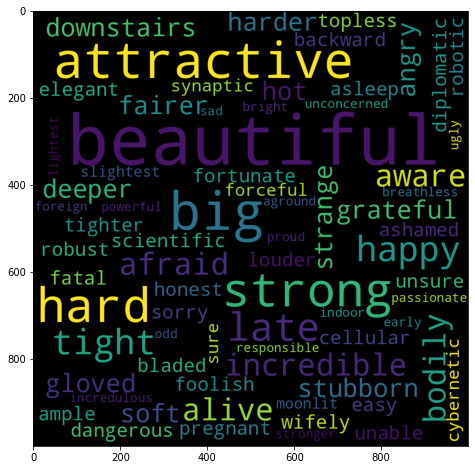

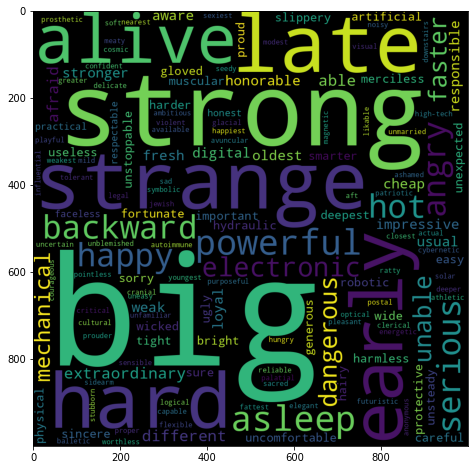

In [18]:
total_adj_f = get_total_values(adj_dic_f)
total_adj_m = get_total_values(adj_dic_m)

fem_wc_adj = WordCloud(width = 1000, height = 1000, max_words=150).generate_from_frequencies(total_adj_f)
male_wc_adj = WordCloud(width = 1000, height = 1000, max_words=150).generate_from_frequencies(total_adj_m)


plt.figure(figsize=(15,8))
plt.imshow(fem_wc_adj)

plt.figure(figsize=(15,8))
plt.imshow(male_wc_adj)

In [19]:

#movies_dict body descriptions
#movies_dict_1 #inappropriate

#get total amount for each movie

movie_stats = {movie: sum(words.values()) for movie, words in movies_dict.items()}

movie_stats_inapp = {movie: sum(words.values()) for movie, words in movies_dict_1.items()}
print(movie_stats)

print(movie_stats_inapp)

#some statistics
import statistics

mean_val = statistics.mean(movie_stats.values()) #average amount of body descriptions

max_val = max(movie_stats.values())
print('mean:', mean_val, 'max', max_val)
#max = titanic
#movies under the avg should be considered normal.
#then raise incrementally

#how to avoid misleading based on the fact that some movies just contain many descriptions like hand. --> narrow keywords.

movie_descriptions = DataFrame.from_dict(movie_stats, orient='index', columns=['count'])
movie_descriptions_inapp= DataFrame.from_dict(movie_stats_inapp, orient='index', columns=['inappropriate_count'])

movie_descriptions.reset_index(inplace=True)
movie_descriptions_inapp.reset_index(inplace=True)

movie_descriptions = movie_descriptions.rename(columns={'index':'script_name'})
movie_descriptions_inapp = movie_descriptions_inapp.rename(columns={'index':'script_name'})

movie_desc_graph= merge(movie_descriptions,movie_descriptions_inapp, left_on='script_name', right_on='script_name')
movie_desc_graph


{'Star Wars_ episode IV': 17, 'The-Exorcist': 83, 'fiddler on the roof': 7, 'song-of-the-south': 1, 'ManofSteelnSecondDraftn': 70, 'pirates-of-the-caribbean-dead-mans-chest-2006': 23, 'star-wars-lastjedi': 1, 'meninblack': 28, 'superman': 37, 'lawrence-of-arabia-1962': 3, 'independenceday': 27, 'the-godfather': 45, 'spider-man-2-2004': 41, 'harry-potter-and-the-deathly-hollows-part-2-2011': 54, 'the-avengers-2012': 25, 'top-gun-1986': 30, 'SomeLikeItHot': 47, 'jurassicpark': 43, 'starwars_revenge-of-sith': 15, 'star wars_the-empire-strikes-back': 24, 'terminator-2-judgement-day-1991': 132, 'the-graduate': 69, 'samson-and-delilah': 9, 'avatar': 91, 'casablanca': 32, 'ghostbuster': 10, 'beverly-hills-copII': 11, 'jaws-1975': 18, 'from_here_to_eternity_(1953)': 40, 'rogue-one': 12, 'batmanforever': 1, 'rocky': 17, 'BlackPanther': 51, 'gone with the wind': 16, 'forrestgump': 20, 'starwars_thephantomenace': 8, 'dark-knight': 30, 'West-Side-Story-Read-The-Screenplay': 73, 'star-wars-return-o

,script_name,count,inappropriate_count
0,Star Wars_ episode IV,17,0
1,The-Exorcist,83,2
2,fiddler on the roof,7,0
3,song-of-the-south,1,0
4,ManofSteelnSecondDraftn,70,0
...,...,...,...
74,harry-potter-and-the-sorcerers-stone-2001,17,0
75,pirates-of-the-caribbean-the-curse-of-the-blac...,60,0
76,titanic-numbered,214,2
77,Grease-Cast-Script-Final,18,0


In [2]:


import difflib
df_all_movies = read_csv('/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/bechdel/all_movies_bechdel.csv')

# Here we are using a library difflib which will allow us to get the actual names of the movies from the dataset already prepared
import difflib
titles = df_all_movies['Title'].to_list()
titles_to_check= movie_desc_graph['script_name'].to_list()
titles_match=[]
for i in titles_to_check:
    titles_match.append(difflib.get_close_matches(i, titles, len(titles), 0)[0])

fem_desc_graph = DataFrame(list(zip(titles_match,titles_to_check)),
               columns =['movie', 'script_name'])
fem_desc_graph = fem_desc_graph.merge(movie_desc_graph, left_on="script_name", right_on= "script_name")

fem_desc_graph_1 = fem_desc_graph.merge(df_all_movies, left_on = 'movie', right_on= 'Title', how='right')

import numpy as np

vals = fem_desc_graph['count'].to_list()
inapp_vals = fem_desc_graph['inappropriate_count'].to_list()

# calculate the mean value of the sum of the values
mean_val =  sum(vals)/len(vals) #average amount of body descriptions

# calculate the percentile for the maximum value
max_val = max(vals)
max_percentile = 35

# create a dictionary mapping each value to its percentile
score = []

for i, val in enumerate(vals):
    if val < mean_val:
        film_score = 0
    else:
        film_score = ((val-mean_val)/(max_val-mean_val))*30 + 1
    if inapp_vals[i] > 0:
        sigmoid_val = 1 / (1 + np.exp(-(inapp_vals[i] - 2.5) / 2))  # adjust the 2.5 parameter to adjust the sensitivity
        inapp_score = sigmoid_val * 10
        film_score += inapp_score
    score.append(min(film_score, max_percentile))

fem_desc_graph['score'] = score


fem_desc_graph_1

# fem_desc_graph.to_csv('/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/fem_descriptions_df_graph.csv')
# fem_desc_graph



NameError: name 'read_csv' is not defined

,movie,script_name,count,inappropriate_count,score
0,Star Wars: Episode IV - A New Hope,Star Wars_ episode IV,17,0,-1.368293
1,The Exorcist,The-Exorcist,83,2,18.916881
2,Fiddler on the Roof,fiddler on the roof,7,0,4.455408
3,Song of the South,song-of-the-south,1,0,-0.601305
4,Man of Steel,ManofSteelnSecondDraftn,70,0,7.070892
...,...,...,...,...,...
74,Harry Potter and the Sorcerers Stone,harry-potter-and-the-sorcerers-stone-2001,17,0,-1.368293
75,Pirates of the Caribbean: The Curse of the Bla...,pirates-of-the-caribbean-the-curse-of-the-blac...,60,0,5.478593
76,Titanic,titanic-numbered,214,2,30.000000
77,The Greatest Show on Earth,Grease-Cast-Script-Final,18,0,-1.209063


In [21]:

import difflib
df_all_movies = read_csv('/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/bechdel/all_movies_bechdel.csv')

# Here we are using a library difflib which will allow us to get the actual names of the movies from the dataset already prepared
import difflib
titles = df_all_movies['Title'].to_list()
titles_to_check= male_adjectives_df['script_name'].to_list()
titles_match=[]
for i in titles_to_check:
    titles_match.append(difflib.get_close_matches(i, titles, len(titles), 0)[0])

final_m = DataFrame(list(zip(titles_match,titles_to_check)),
               columns =['movie', 'script_name'])
final_m = final_m.merge(male_adjectives_df, left_on="script_name", right_on= "script_name")

final_m

,movie,script_name,on,bright,mechanical,some,early,powerful,unable,delicate,...,meager,skeletal,dishonest,respectable,richest,catatonic,nearer,bravest,incompatible,operational
0,Star Wars: Episode IV - A New Hope,Star Wars_ episode IV,6.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fiddler on the Roof,fiddler on the roof,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Man of Steel,ManofSteelnSecondDraftn,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pirates of the Caribbean: Dead Mans Chest,pirates-of-the-caribbean-dead-mans-chest-2006,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Star Wars: Episode VIII - The Last Jedi,star-wars-lastjedi,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Superman,superman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Mary Poppins,mary-poppins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,The Bible,The Bible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Star Wars: Episode I - The Phantom Menace,starwars_thephantomenace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
